In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

from pandas_datareader import data, wb
start = pd.Timestamp('2016-1-1')
end = pd.Timestamp('2017-1-1')
f = data.DataReader("F", 'yahoo', start, end)

### Let's find some time series data
hint: http://pandas.pydata.org/pandas-docs/stable/remote_data.html

In [2]:
from pandas_datareader import data, wb
start = pd.Timestamp('2016-1-1')
end = pd.Timestamp('2017-1-1')
f = data.DataReader("F", 'yahoo', start, end)

In [3]:
f.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,13.87,14.00,13.75,13.97,12.520291,38618500
2016-01-05,13.97,14.00,13.51,13.72,12.296234,50267500
2016-01-06,13.56,13.56,13.05,13.11,11.749536,61285500
2016-01-07,12.90,13.04,12.60,12.70,11.382083,57846700
2016-01-08,13.05,13.10,12.50,12.54,11.238686,46199400


### Plot the high and low values of Yahoo's stock for July and August 2012

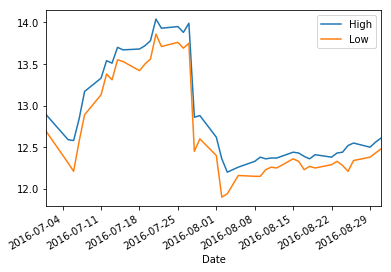

In [4]:
# %load snippets/prac1.py
f['2016-07':'2016-08'][['High', 'Low']].plot()

### Is the variance of the trading volume relatively stable over time?

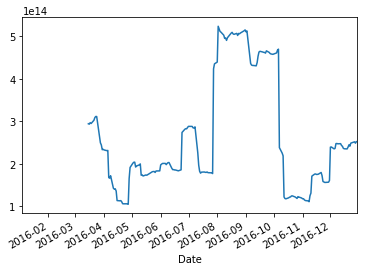

In [5]:
# %load snippets/prac2.py
r = f.rolling(50).var()['Volume'].plot()

### Is the expanding window variance of the trading volume relatively stable over time?

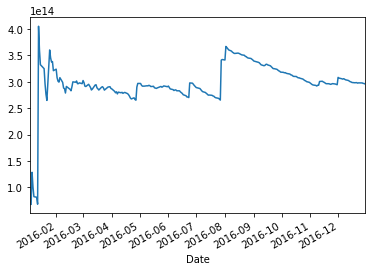

In [6]:
# %load snippets/prac3.py
r = f.expanding().var()['Volume'].plot()

### On how many days did the stock close higher than it opened?

Hint: check out .tshift() in the pandas docs
http://pandas.pydata.org/pandas-docs/stable/timeseries.html#shifting-lagging

In [7]:
# %load snippets/prac4.py
lagged = f.shift(1)
sum((f - lagged)['Open'] > 0)
f['DayGain'] = f['Open'] - lagged['Open']
sum(f['DayGain'] > 0)/len(f['DayGain'])

0.48015873015873017

### And did the 'up' days become more or less frequent over time?

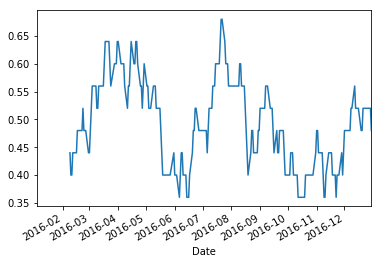

In [8]:
# %load snippets/prac5.py
f.rolling(window = 25)['DayGain'].apply(lambda x: len([x_i for x_i in x if x_i > 0])/len(x)).plot()

### Compute and plot the mean monthly High value of the stock

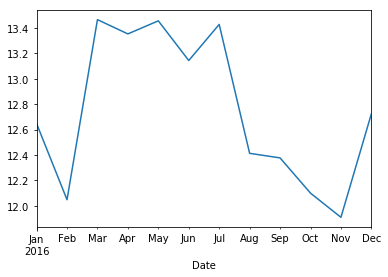

In [9]:
# %load snippets/prac6.py
f.resample('M').mean()['High'].plot()

### Explore the variance of the differenced volume

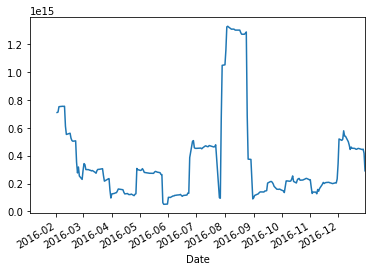

In [10]:
# %load snippets/prac7.py
volume = f.Volume
volume_lagged = f.Volume.shift()
diffed_volume = volume - volume_lagged
diffed_volume.rolling(window = 20).var().plot()

### Does the lagged time series correlate with itself?

In [11]:
# %load snippets/prac8.py
# What's the best predictor of tomorrow's stock price?
pd.DataFrame({'real':f.Volume, 'lagged':f.Volume.shift()}).corr()

,lagged,real
lagged,1.000000,0.417291
real,0.417291,1.000000
